### Dependencies

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import graphviz
from sklearn import tree
from IPython.display import Image, display
import pydotplus

### Loading the Data

In [3]:
iris_data=datasets.load_iris()
iris_df=pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
iris_df['target']=iris_data['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Pairplot

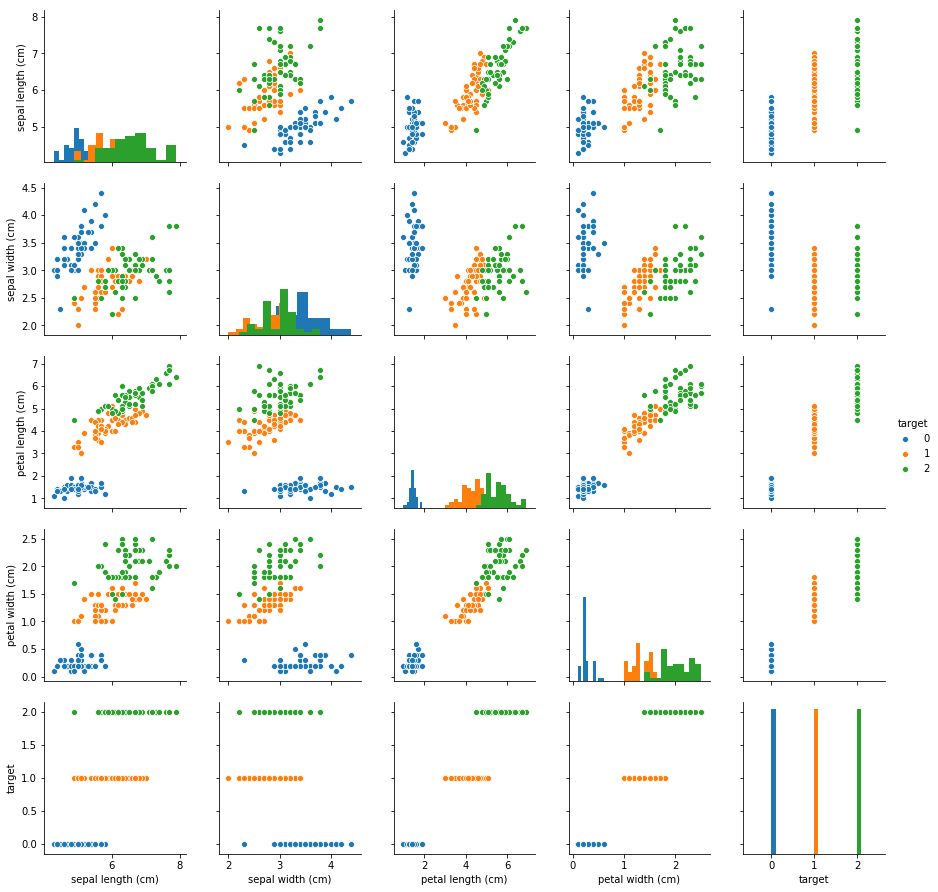

In [4]:
sns.pairplot(iris_df, hue='target', diag_kind='hist')

### Correlation

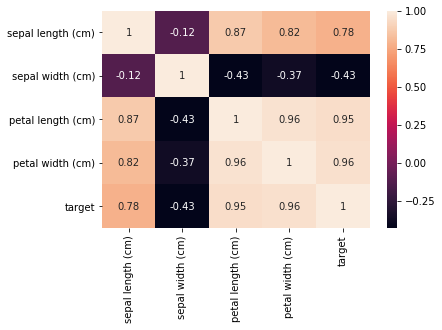

In [5]:
corr = iris_df.corr()
sns.heatmap(corr, annot=True)

### Model Training

In [6]:
iris_df['target'] = iris_df['target'].map({0: iris_data['target_names'][0],
                                          1: iris_data['target_names'][1],
                                          2: iris_data['target_names'][2]})
X=iris_df.drop('target', axis=1)
y=iris_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y)
DTC=DecisionTreeClassifier()
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

### Model Evaluation

In [7]:
DTC.score(X_test, y_test)

0.9210526315789473

Text(0.5, 1.0, 'Confusion matrix')

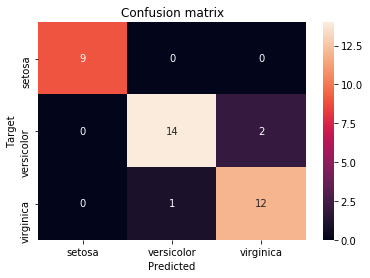

In [8]:
cm = confusion_matrix(y_test, DTC.predict(X_test))
sns.heatmap(cm, annot=True, xticklabels=['setosa', 'versicolor', 'virginica'], 
            yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')

### Visualization

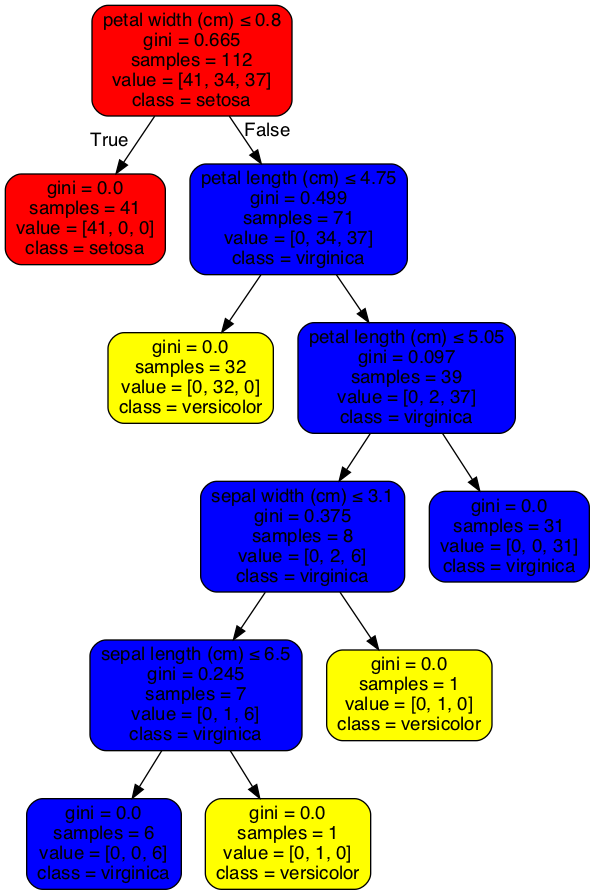

In [9]:
dot_data = tree.export_graphviz(DTC, out_file=None, 
                                feature_names=iris_data['feature_names'],  
                                class_names=iris_data['target_names'],  
                                filled=True, rounded=True,  
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('red', 'yellow', 'blue')
nodes = graph.get_node_list()
for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')]
        color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2])
        node.set_fillcolor(colors[np.argmax(values)])
graph.write_png('colored_tree.png')
def viewPydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

viewPydot(graph)

In [158]:
X, y=datasets.make_classification(n_samples=20, n_features=2, n_redundant=0)

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
DTC=DecisionTreeClassifier()
DTC.fit(X_train, y_train)
DTC.score(X_test, y_test)

1.0

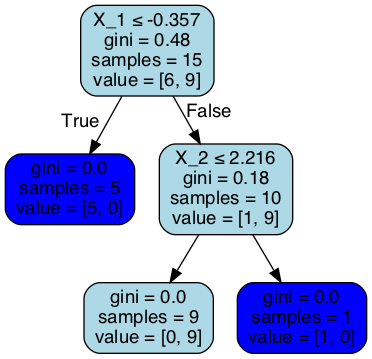

In [160]:
dot_data = tree.export_graphviz(DTC, out_file=None, 
#                                 feature_names=iris_data['feature_names'],  
                                feature_names=['X_1', 'X_2'],                                  
#                                 class_names=iris_data['target_names'],  
                                filled=True, rounded=True,  
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
# colors = ('red', 'yellow', 'blue')
colors = ('blue', 'lightblue')
nodes = graph.get_node_list()
for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')]
#         color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2])
        color = '#{:02x}{:02x}'.format(values[0], values[1])
        node.set_fillcolor(colors[np.argmax(values)])
graph.write_png('colored_tree.png')
def viewPydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

viewPydot(graph)

In [161]:
df=pd.DataFrame(X_train, columns=['X_1', 'X_2'])
df['Y']=y_train
df.sort_values(['X_2', 'X_1'])
# df.sort_values(['X_1', 'X_2'])

,X_1,X_2,Y
5,-1.667744,-3.344861,0
7,-1.348619,-2.211462,0
11,1.331921,-1.556541,1
9,-0.941442,-0.789561,0
3,0.714623,-0.757406,1
14,0.751371,-0.526852,1
4,0.409226,0.801562,1
2,0.693127,0.851843,1
12,0.644379,1.054716,1
0,-1.124875,1.082365,0


Text(0.3, 2.5, 'X_2 = 2.216')

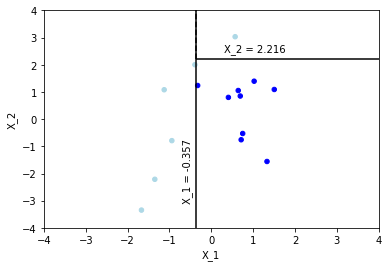

In [180]:
colormap={0: 'lightblue', 
       1: 'blue'}
colors=[colormap[value] for value in df['Y']]
df.plot(kind='scatter', x='X_1', y='X_2', c=colors)
plt.vlines(-.357, -4, 2.216)
plt.hlines(2.216, -.357, 4)
plt.vlines(-.357, 2.216, 4, linestyles='--')
plt.xlim(-3, 3)
# plt.vlines(1.454, -.23, 2)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.annotate('X_1 = -0.357', (-.7, -1), rotation=90)
plt.annotate('X_2 = 2.216', (.3, 2.5))